In [52]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from sklearn import datasets
import hvplot.pandas
import requests
import geopandas as gpd


# Import API key
from api_keys import geoapify_key

ModuleNotFoundError: No module named 'fiona'

In [53]:
# Store filepath in a variable
countries_data = Path("../archive/Data_2022.csv")
file_df = pd.read_csv(countries_data)
file_df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.238,0.776,0.614,0.268


In [22]:
# Drop data before year 2019
clean_file_df = file_df.loc[(file_df["year"] >= 2019), :].dropna()
new_df = clean_file_df.drop(columns=['Log GDP per capita', 'Freedom to make life choices', 'Generosity', 'Positive affect', 'Negative affect','Perceptions of corruption'])


#Reset the index
new_df.reset_index(drop=True)





,Country name,year,Life Ladder,Social support,Healthy life expectancy at birth
0,Afghanistan,2019,2.375,0.420,53.900
1,Afghanistan,2021,2.436,0.454,54.550
2,Albania,2019,4.995,0.686,69.100
3,Albania,2020,5.365,0.710,69.125
4,Albania,2021,5.255,0.702,69.150
...,...,...,...,...,...
447,Zambia,2021,3.082,0.619,55.250
448,Zimbabwe,2019,2.694,0.759,53.100
449,Zimbabwe,2020,3.160,0.717,53.575
450,Zimbabwe,2021,3.155,0.685,54.050


In [23]:
new_df = new_df.loc[(file_df["year"] >= 2022), :].dropna()
new_df

,Country name,year,Life Ladder,Social support,Healthy life expectancy at birth
28,Albania,2022,5.212,0.724,69.175
59,Argentina,2022,6.261,0.893,67.250
75,Armenia,2022,5.382,0.811,67.925
91,Australia,2022,7.035,0.942,71.125
106,Austria,2022,6.999,0.876,71.275
...,...,...,...,...,...
2087,United States,2022,6.693,0.900,65.725
2104,Uruguay,2022,6.671,0.905,67.500
2120,Uzbekistan,2022,6.016,0.879,65.600
2154,Vietnam,2022,6.267,0.879,65.600


In [24]:
# coordinates = {
#     "latitude": [-31.9523, -33.8688, -27.4705],
#     "longitude": [115.8613, 151.2093, 153.0260]}
# coordinates_df = pd.DataFrame(coordinates)


# frames = [new_df, coordinates_df]
  
# result = pd.concat(frames)
# display(result)


# map_plot_3 = result.hvplot.points(
#     "longitude",
#     "latitude",
#     geo = True,
#     global_extent=True,
#     tiles = "OSM",
#     frame_width = 700,
#     frame_height = 500,
#     size = "Life Ladder",
#     scale = 1,
#     color = "Country name")
# # Display the map plot
# map_plot_3


In [25]:
print(clean_file_df.shape[0])

452


In [26]:
#Clean dataframe and drop unnecessary columns
new_df = clean_file_df.drop(columns=['Log GDP per capita', 'Freedom to make life choices', 'Generosity', 'Positive affect', 'Negative affect'])
print(new_df.head())

   Country name  year  Life Ladder  Social support  \
11  Afghanistan  2019        2.375           0.420   
12  Afghanistan  2021        2.436           0.454   
25      Albania  2019        4.995           0.686   
26      Albania  2020        5.365           0.710   
27      Albania  2021        5.255           0.702   

    Healthy life expectancy at birth  Perceptions of corruption  
11                            53.900                      0.924  
12                            54.550                      0.946  
25                            69.100                      0.914  
26                            69.125                      0.891  
27                            69.150                      0.896  


In [27]:
new_df.reset_index(drop=True)

,Country name,year,Life Ladder,Social support,Healthy life expectancy at birth,Perceptions of corruption
0,Afghanistan,2019,2.375,0.420,53.900,0.924
1,Afghanistan,2021,2.436,0.454,54.550,0.946
2,Albania,2019,4.995,0.686,69.100,0.914
3,Albania,2020,5.365,0.710,69.125,0.891
4,Albania,2021,5.255,0.702,69.150,0.896
...,...,...,...,...,...,...
447,Zambia,2021,3.082,0.619,55.250,0.824
448,Zimbabwe,2019,2.694,0.759,53.100,0.831
449,Zimbabwe,2020,3.160,0.717,53.575,0.789
450,Zimbabwe,2021,3.155,0.685,54.050,0.757


In [28]:
#Sort test 1 - part 1
sorted_df = new_df.sort_values(['year', 'Life Ladder'], ascending=(True, True))
print(sorted_df.head())

     Country name  year  Life Ladder  Social support  \
11    Afghanistan  2019        2.375           0.420   
2195     Zimbabwe  2019        2.694           0.759   
844         India  2019        3.249           0.561   
1647       Rwanda  2019        3.268           0.489   
2179       Zambia  2019        3.307           0.638   

      Healthy life expectancy at birth  Perceptions of corruption  
11                                53.9                      0.924  
2195                              53.1                      0.831  
844                               60.3                      0.752  
1647                              60.2                      0.168  
2179                              54.4                      0.832  


In [29]:
#Sort test 1 - part 2
sorted_df = new_df.sort_values(['year', 'Life Ladder'], ascending=(True, False))
print(sorted_df.head())

     Country name  year  Life Ladder  Social support  \
634       Finland  2019        7.780           0.937   
1874  Switzerland  2019        7.694           0.949   
518       Denmark  2019        7.693           0.958   
1481       Norway  2019        7.442           0.942   
1392  Netherlands  2019        7.425           0.941   

      Healthy life expectancy at birth  Perceptions of corruption  
634                               71.0                      0.195  
1874                              72.5                      0.294  
518                               71.0                      0.174  
1481                              71.4                      0.271  
1392                              71.4                      0.360  


In [30]:
#Sort test 2 - part 1
sorted_df = new_df.sort_values(['year', 'Life Ladder'])
print(sorted_df.head())

     Country name  year  Life Ladder  Social support  \
11    Afghanistan  2019        2.375           0.420   
2195     Zimbabwe  2019        2.694           0.759   
844         India  2019        3.249           0.561   
1647       Rwanda  2019        3.268           0.489   
2179       Zambia  2019        3.307           0.638   

      Healthy life expectancy at birth  Perceptions of corruption  
11                                53.9                      0.924  
2195                              53.1                      0.831  
844                               60.3                      0.752  
1647                              60.2                      0.168  
2179                              54.4                      0.832  


In [31]:
#Sort test 2 - part 2
sorted_df = new_df.sort_values(['year', 'Life Ladder'], ascending=False)
print(sorted_df.head())

     Country name  year  Life Ladder  Social support  \
637       Finland  2022        7.729           0.974   
925        Israel  2022        7.662           0.954   
521       Denmark  2022        7.545           0.970   
830       Iceland  2022        7.449           0.985   
1865       Sweden  2022        7.431           0.949   

      Healthy life expectancy at birth  Perceptions of corruption  
637                             71.225                      0.190  
925                             72.850                      0.655  
521                             71.375                      0.203  
830                             72.075                      0.692  
1865                            72.275                      0.213  


In [32]:
#Sort test 3 - part 1
sorted_df = new_df.sort_values('year')

#Get the 5 countries with the highest Life Ladder scores in the selected rows.
highest_life_ladder = sorted_df.nlargest(5, 'Life Ladder')
print('Countries with the highest Ladder Scores:')
print(highest_life_ladder[['Country name', 'year', 'Life Ladder',]])

Countries with the highest Ladder Scores:
    Country name  year  Life Ladder
635      Finland  2020        7.889
636      Finland  2021        7.794
634      Finland  2019        7.780
637      Finland  2022        7.729
520      Denmark  2021        7.699


In [33]:
#Sort test 3 - part 2
#Get the 5 countries with the highest Life Ladder scores in the selected
lowest_life_ladder = sorted_df.nsmallest(5, 'Life Ladder')
print('Countries with the lowest Ladder Scores:')
print(lowest_life_ladder[['Country name', 'year', 'Life Ladder']])

Countries with the lowest Ladder Scores:
      Country name  year  Life Ladder
1116       Lebanon  2021        2.179
1117       Lebanon  2022        2.352
11     Afghanistan  2019        2.375
12     Afghanistan  2021        2.436
1709  Sierra Leone  2022        2.560


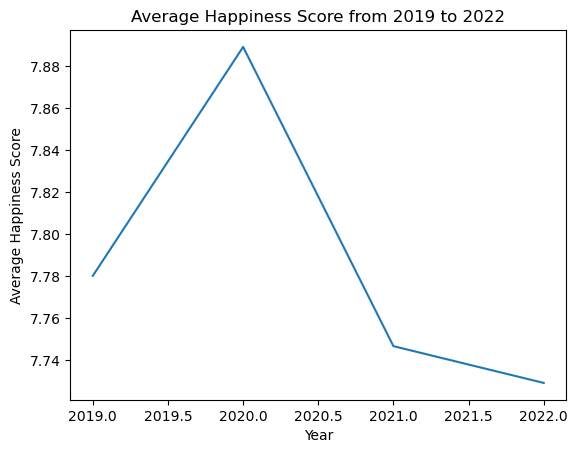

In [34]:
# Calculate the average Happiness Score for each year
yearly_means = highest_life_ladder.groupby('year')['Life Ladder'].mean()

# Create a line plot of the yearly means
highest_life_ladder['year'] = highest_life_ladder['year'].astype(str)
plt.plot(yearly_means.index, yearly_means.values)
plt.xlabel('Year')
plt.ylabel('Average Happiness Score')
plt.title('Average Happiness Score from 2019 to 2022')
plt.show()


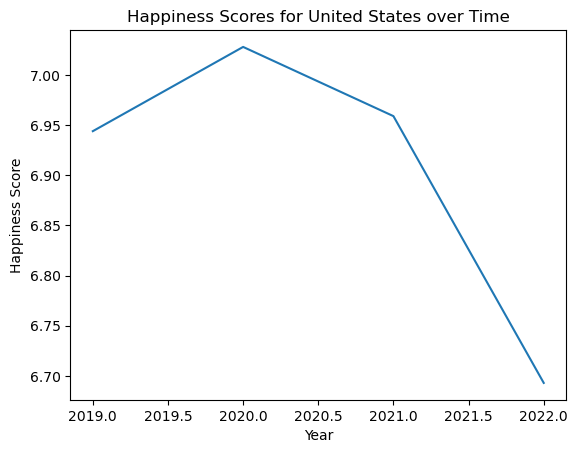

In [35]:
#Line plot of happiness socres over time - US only
sorted_df= sorted_df.loc[sorted_df['Country name'] == 'United States']

# create a line plot of happiness scores over time

plt.plot(sorted_df['year'], sorted_df['Life Ladder'])

# add axis labels and a title
sorted_df['year'] = sorted_df['year'].astype(str)
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.title('Happiness Scores for United States over Time')

# display the plot
plt.show()

In [36]:
#Sort test 3 - part 1
sorted_df = new_df.sort_values('Life Ladder')
yearly_means = highest_life_ladder.groupby('Country name')['Life Ladder'].mean()


#Get the 5 countries with the highest Life Ladder scores in the selected rows.
highest_life_ladder = sorted_df.nlargest(10, 'Life Ladder')
print('Countries with the highest Ladder Scores:')
print(highest_life_ladder[['Country name', 'year', 'Life Ladder',]])

Countries with the highest Ladder Scores:
     Country name  year  Life Ladder
635       Finland  2020        7.889
636       Finland  2021        7.794
634       Finland  2019        7.780
637       Finland  2022        7.729
520       Denmark  2021        7.699
1874  Switzerland  2019        7.694
518       Denmark  2019        7.693
925        Israel  2022        7.662
924        Israel  2021        7.578
828       Iceland  2020        7.575


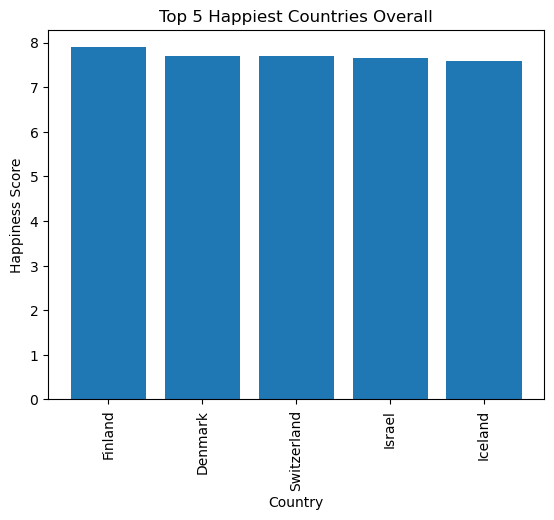

In [37]:
#Bar chart of top 5 happiest countries
# select data for most recent year


# sort data by happiness score
figure1 = highest_life_ladder.sort_values(by=['Life Ladder'], ascending=False)

# select top 5 happiest countries
figure1 = highest_life_ladder.head(5)

# create a bar chart of the top 10 happiest countries
plt.bar(highest_life_ladder['Country name'], highest_life_ladder['Life Ladder'])

# add axis labels and a title
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top 5 Happiest Countries Overall')

# rotate x-axis labels for readability
plt.xticks(rotation=90)

# display the plot
plt.show()

In [94]:
# coordinates = {
#     "latitude": [61.9241, 61.9241, 61.9241, 61.9241, 56.2639, 46.8182, 56.2639, 31.0461, 31.0461, 31.0461, 64.9631],
#     "longitude": [25.7482, 25.7482, 25.7482, 25.7482, 9.5018, 8.2275, 9.5018, 34.8516, 34.8516, 34.8516, 19.0208]}
# coordinates_df = pd.DataFrame(coordinates)

new_df = highest_life_ladder.assign(latitude = ["61.9241", "61.9241", "61.9241", "61.9241", "56.2639", "46.8182", 
                                                "56.2639", "31.0461", "31.0461", "64.9631"], 
                                   longitude = ["25.7482", "25.7482", "25.7482", "25.7482", "9.5018", 
                                                "8.2275", "9.5018", "34.8516", "34.8516", "19.0208"])


map_plot_3 = new_df.hvplot.points(
    "longitude",
    "latitude",
    geo = True,
    tiles = True,
    xlim=(-180, 30),
    ylim = (0, 72),
    scale = 0.1,
    color = "blue",
    hover_cols = ["Country name"])
# Display the map plot
map_plot_3

#Work Cited: https://hvplot.holoviz.org/user_guide/Geographic_Data.html

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]   (Country name)

In [100]:
#Sort test 3 - part 2
#Get the 5 countries with the highest Life Ladder scores in the selected
sorted_df = new_df.sort_values('Life Ladder')
yearly_means = lowest_life_ladder.groupby('Country name')['Life Ladder'].mean()



lowest_life_ladder = sorted_df.nsmallest(10, 'Life Ladder')
print('Countries with the lowest Ladder Scores:')
print(lowest_life_ladder[['Country name', 'year', 'Life Ladder']])

Countries with the lowest Ladder Scores:
     Country name  year  Life Ladder
828       Iceland  2020        7.575
924        Israel  2021        7.578
925        Israel  2022        7.662
518       Denmark  2019        7.693
1874  Switzerland  2019        7.694
520       Denmark  2021        7.699
637       Finland  2022        7.729
634       Finland  2019        7.780
636       Finland  2021        7.794
635       Finland  2020        7.889


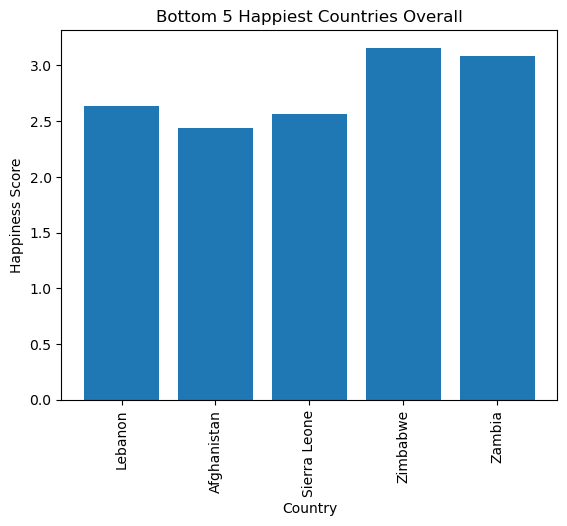

In [146]:
#Bar chart of bottom 5 happiest countries
# select data for most recent year


# sort data by happiness score
figure1 = lowest_life_ladder.sort_values(by=['Life Ladder'], ascending=False)

# select top 5 happiest countries
figure1 = lowest_life_ladder.head(5)

# create a bar chart of the top 10 happiest countries
plt.bar(lowest_life_ladder['Country name'], lowest_life_ladder['Life Ladder'])

# add axis labels and a title
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Bottom 5 Happiest Countries Overall')

# rotate x-axis labels for readability
plt.xticks(rotation=90)

# display the plot
plt.show()

In [99]:
# coordinates = {
#     "latitude": [33.8547, 33.8547, 33.9391, 33.9391, 8.4606, 19.0154, 13.1339],
#     "longitude": [35.8623, 35.8623, 67.7100, 67.7100, 11.7799, 29.1549, 27.8493]}
# coordinates_df = pd.DataFrame(coordinates)
print(lowest_life_ladder)

new_df = lowest_life_ladder.assign(latitude = ["33.8547", "33.8547", "33.9391", "33.9391", "8.4606", "19.0154", "13.1339"],
                                    longitude = ["35.8623", "35.8623", "67.7100", "67.7100", "11.7799", "29.1549", "27.8493"])

# frames = [coordinates_df, lowest_life_ladder]
  
# result = pd.concat(frames)



map_plot_3 = new_df.hvplot.points(
    "longitude",
    "latitude",
    geo = "ESRI",
    tiles = True,
    xlim=(-180, 30),
    ylim = (0, 72),
    scale = 0.1,
    color = "red")
# Display the map plot
map_plot_3

#Work Cited: https://hvplot.holoviz.org/user_guide/Geographic_Data.html

     Country name  year  Life Ladder  Social support  \
828       Iceland  2020        7.575           0.983   
924        Israel  2021        7.578           0.917   
925        Israel  2022        7.662           0.954   
518       Denmark  2019        7.693           0.958   
1874  Switzerland  2019        7.694           0.949   
520       Denmark  2021        7.699           0.945   
637       Finland  2022        7.729           0.974   
634       Finland  2019        7.780           0.937   
636       Finland  2021        7.794           0.970   
635       Finland  2020        7.889           0.962   

      Healthy life expectancy at birth  Perceptions of corruption latitude  \
828                             72.025                      0.644  64.9631   
924                             72.700                      0.726  31.0461   
925                             72.850                      0.655  31.0461   
518                             71.000                      0.174  56.2

ValueError: Length of values (7) does not match length of index (10)

In [101]:
# #Bar chart of bottom 5 happiest countries
# # select data for most recent year


# # sort data by happiness score
# figure1 = lowest_life_ladder.sort_values(by=['Life Ladder'], ascending=False)

# # select top 5 happiest countries
# figure1 = lowest_life_ladder.head(5)

# # create a bar chart of the top 10 happiest countries
# plt.plot(lowest_life_ladder['Country name'], lowest_life_ladder['Life Ladder'])

# # add axis labels and a title
# plt.xlabel('Country')
# plt.ylabel('Happiness Score')
# plt.title('Bottom 5 Happiest Countries Overall')

# # rotate x-axis labels for readability
# plt.xticks(rotation=90)

# # display the plot
# plt.show()

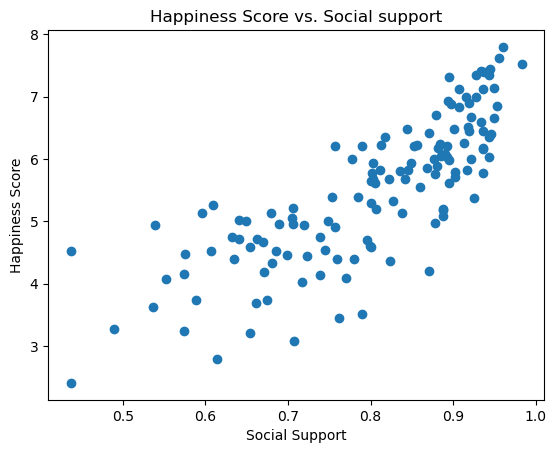

In [147]:
#Scatter plot of happiness score vs. Social Support
#select data for most recent year
figure2 = sorted_df.groupby('Country name').mean()

# create a scatter plot of happiness score vs.Social Support
plt.scatter(figure2['Social support'], figure2['Life Ladder'])

# add axis labels and a title
plt.xlabel('Social Support')
plt.ylabel('Happiness Score')
plt.title('Happiness Score vs. Social support')

# display the plot
plt.show()

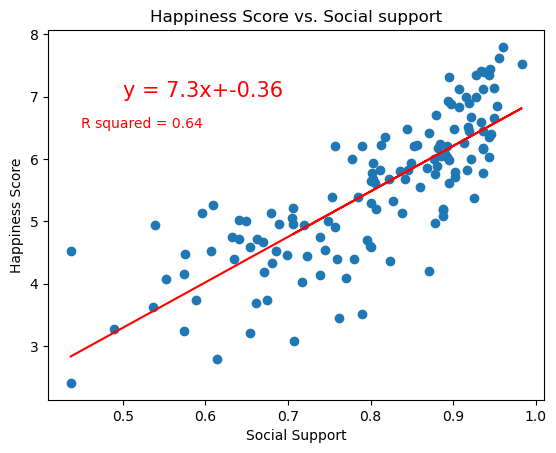

In [148]:
#Scatter plot of happiness score vs. Social Support
figure2 = sorted_df.groupby('Country name').mean()

# create a scatter plot of happiness score vs.Social Support
plt.scatter(figure2['Social support'], figure2['Life Ladder'])

# add axis labels and a title
plt.xlabel('Social Support')
plt.ylabel('Happiness Score')
plt.title('Happiness Score vs. Social support')

#preform linear regression
(social_slope, social_intercept, social_rvalue, social_pvalue, social_std_err) = st.linregress(figure2['Social support'], figure2['Life Ladder'])
regress_values = figure2['Social support'] * social_slope + social_intercept
line_eq = "y = " + str(round(social_slope,2)) + "x+" + str(round(social_intercept,2))

#find r^2
social_r_sq = social_rvalue**2
soc_r_annotate = "R squared = " + str(round(social_r_sq,2))

#plot regression line
plt.plot(figure2['Social support'],regress_values,"r-")
plt.annotate(line_eq,(0.5,7),fontsize=15,color="red")
plt.annotate(soc_r_annotate,(0.45,6.5),fontsize=10,color="red")


# display the plot
plt.show()

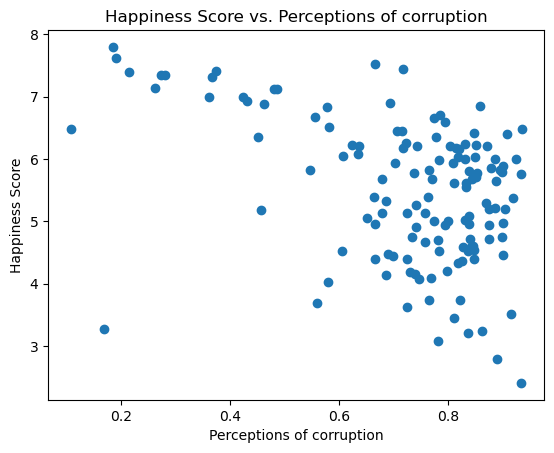

In [149]:
#Scatter plot of happiness score vs. Social Support
#select data for most recent year
figure2 = sorted_df.groupby('Country name').mean()

# create a scatter plot of happiness score vs.Social Support
plt.scatter(figure2['Perceptions of corruption'], figure2['Life Ladder'])

# add axis labels and a title
plt.xlabel('Perceptions of corruption')
plt.ylabel('Happiness Score')
plt.title('Happiness Score vs. Perceptions of corruption')

# display the plot
plt.show()

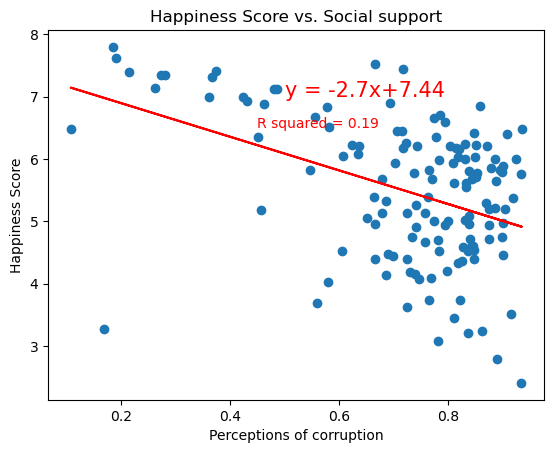

In [70]:
#Scatter plot of happiness score vs. Social Support
figure2 = sorted_df.groupby('Country name').mean()

# create a scatter plot of happiness score vs.Social Support
plt.scatter(figure2['Perceptions of corruption'], figure2['Life Ladder'])

# add axis labels and a title
plt.xlabel('Perceptions of corruption')
plt.ylabel('Happiness Score')
plt.title('Happiness Score vs. Social support')

#preform linear regression
(social_slope, social_intercept, social_rvalue, social_pvalue, social_std_err) = st.linregress(figure2['Perceptions of corruption'], figure2['Life Ladder'])
regress_values = figure2['Perceptions of corruption'] * social_slope + social_intercept
line_eq = "y = " + str(round(social_slope,2)) + "x+" + str(round(social_intercept,2))

#find r^2
social_r_sq = social_rvalue**2
soc_r_annotate = "R squared = " + str(round(social_r_sq,2))

#plot regression line
plt.plot(figure2['Perceptions of corruption'],regress_values,"r-")
plt.annotate(line_eq,(0.5,7),fontsize=15,color="red")
plt.annotate(soc_r_annotate,(0.45,6.5),fontsize=10,color="red")


# display the plot
plt.show()